In [1]:
import matplotlib
import ternary
import math
from ternary.helpers import simplex_iterator
import sys
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
from main import *
scale = 15

In [2]:
def generate_random_heatmap_data(scale, mode, time, agents):
    ''' This function iterates over the simplex 
    Outputs wealth shares for each strategy 
    In the future this function could output other variables of interest
    Note: only the regular 3-strategy space is implemented. '''
    tf_ws = dict()
    vi_ws = dict()
    nt_ws = dict()
    for (i,j,k) in simplex_iterator(scale):
        Coords  = [i / scale, j / scale, k / scale] 
        if mode == 'imitation':
            df,pop = main("between", "scholl", time, PROBA_SELECTION, agents, 0, Coords, True, False)
        if mode == 'static':
            df,pop = main("between", "scholl", time, 0, agents, 0, Coords, True, False)
        if mode == 'combined':
            df,pop = main("between", "scholl", time, PROBA_SELECTION, agents, MUTATION_RATE, Coords, True, False)
        tf_ws[(i,j)] = df["WShare_TF"].mean()
        vi_ws[(i,j)] = df["WShare_VI"].mean()
        nt_ws[(i,j)] = df["WShare_NT"].mean()
    return tf_ws, vi_ws, nt_ws

def generate_ternary_figure(scale, dataDict, title, color):
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(10, 8)
    tax.heatmap(dataDict, style="h",cmap=color)
    tax.boundary()
    tax.clear_matplotlib_ticks()
    ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1, multiple=10)
    tax.left_axis_label("TF")
    tax.right_axis_label("VI")
    tax.bottom_axis_label("NT")
    tax.get_axes().axis('off')
    tax.set_title(title)
    return figure, tax

def dict_substract(dict1, dict2):
    res = {key: dict1[key] - dict2.get(key, 0) for key in dict1.keys()}
    return res


In [3]:
TFws1000, VIws1000, NTws1000 = generate_random_heatmap_data(scale, 'static', 1000, 3)
TFws1000Cb, VIws1000Cb, NTws1000Cb = generate_random_heatmap_data(scale, 'imitation', 1000, 3)

DiffTF = dict_substract(TFws1000,TFws1000Cb)
DiffVI = dict_substract(VIws1000,VIws1000Cb)
DiffNT = dict_substract(NTws1000,NTws1000Cb)





/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

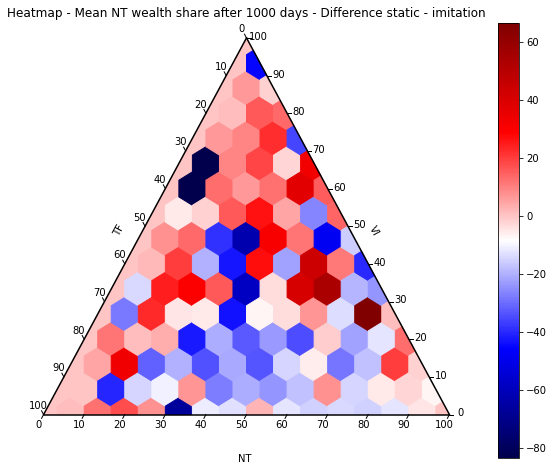

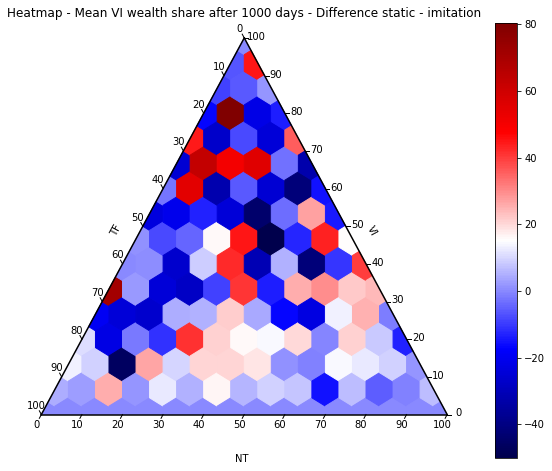

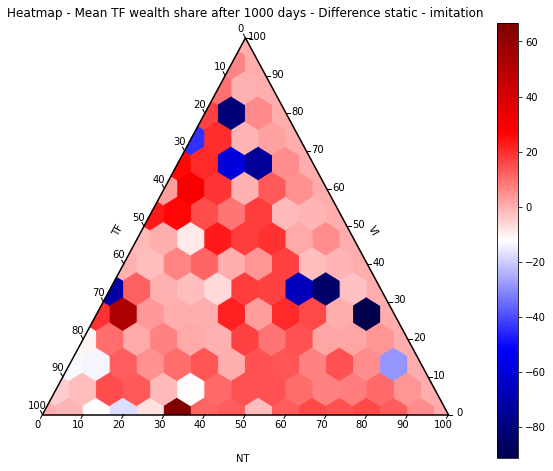

In [5]:
title = "Heatmap - Mean NT wealth share after 1000 days - Difference static - imitation"
figure, tax = generate_ternary_figure(scale, DiffNT, title, color = 'seismic')
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days - Difference static - imitation"
figure, tax = generate_ternary_figure(scale, DiffVI, title, color = 'seismic')
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days - Difference static - imitation"
figure, tax = generate_ternary_figure(scale, DiffTF, title, color = 'seismic')
tax.show()

In [ ]:
time = 100
agents = 3
tf_ws, vi_ws, nt_ws = generate_random_heatmap_data(scale, 'static', time, agents)



In [13]:
time = 100
agents = 3
tf_ws1000, vi_ws1000, nt_ws1000 = generate_random_heatmap_data(scale, 'static', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

In [6]:
time = 100
agents = 3
tf_ws_cb, vi_ws_cb, nt_ws_cb = generate_random_heatmap_data(scale, 'combined', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

In [9]:
time = 1000
agents = 3
tf_ws_cb1000, vi_ws_cb1000, nt_ws_cb1000 = generate_random_heatmap_data(scale, 'combined', time, agents)

/Users/aymericvie/Documents/GitHub/evology/evology/code/steps.py:54: UserWarning: Same price as before.
  warnings.warn('Same price as before.')
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:135: RuntimeWarning: Mean of empty slice
  results[current, 54] = np.nanmean(DailyNTReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:136: RuntimeWarning: Mean of empty slice
  results[current, 55] = np.nanmean(DailyVIReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:84: RuntimeWarning: invalid value encountered in log2
  return (LeverageVI * ind.wealth / p) * np.tanh(SCALE_VI * (math.log2(ind[0]) - np.log2(p))) - ind.asset
/Users/aymericvie/Documents/GitHub/evology/evology/code/data.py:137: RuntimeWarning: Mean of empty slice
  results[current, 56] = np.nanmean(DailyTFReturns)
/Users/aymericvie/Documents/GitHub/evology/evology/code/balance_sheet.py:93: RuntimeWarning: invalid value encountered in log2
  return (LeverageNT * i

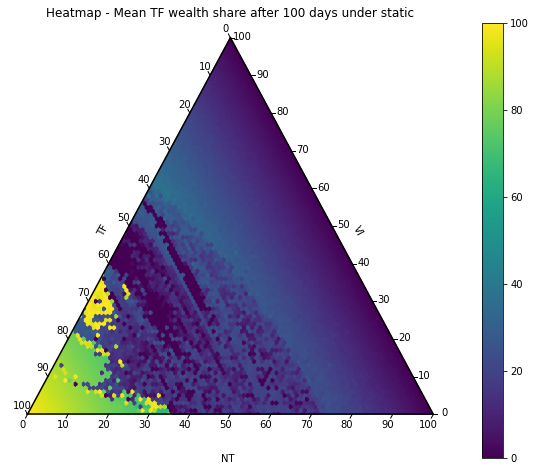

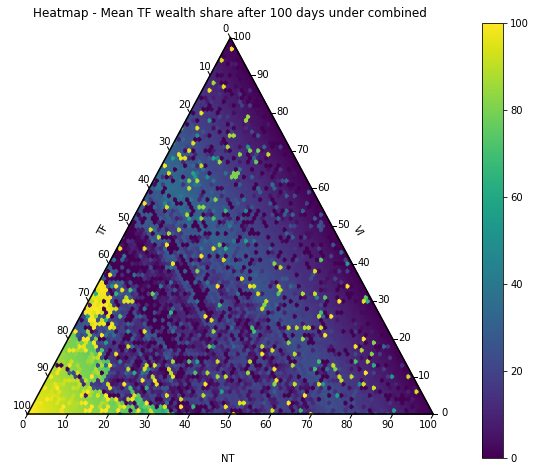

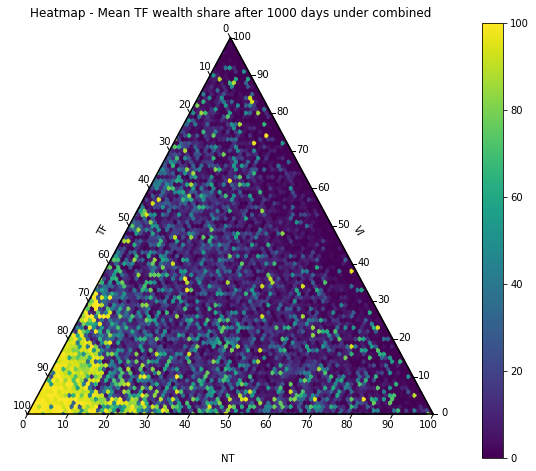

In [10]:

title = "Heatmap - Mean TF wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, tf_ws, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb1000, title)
tax.show()

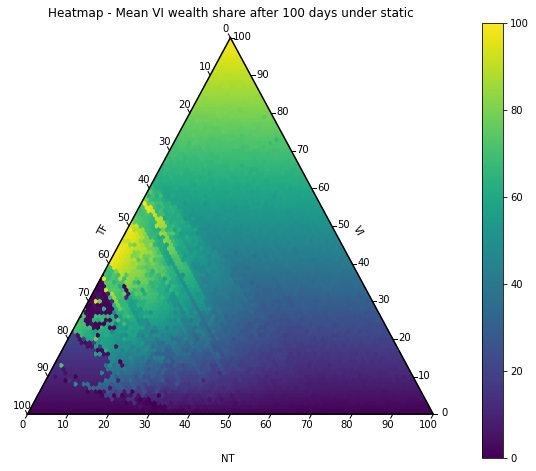

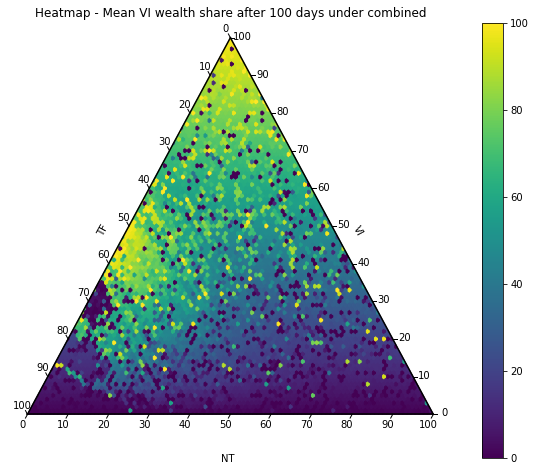

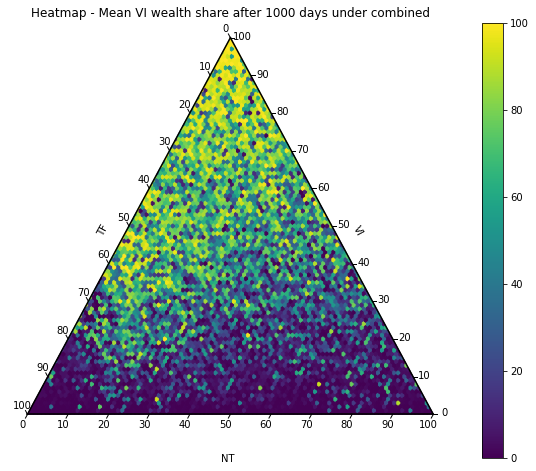

In [11]:
title = "Heatmap - Mean VI wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, vi_ws, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb1000, title)
tax.show()

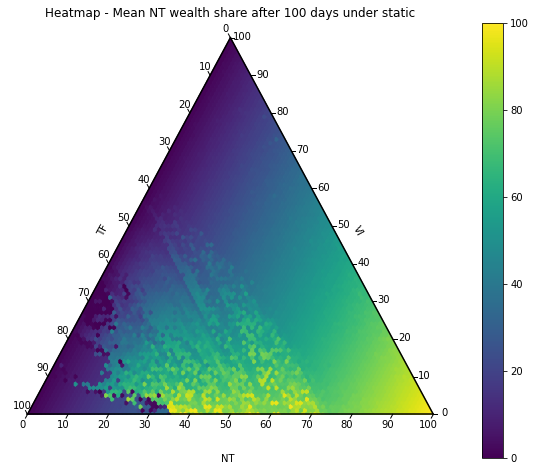

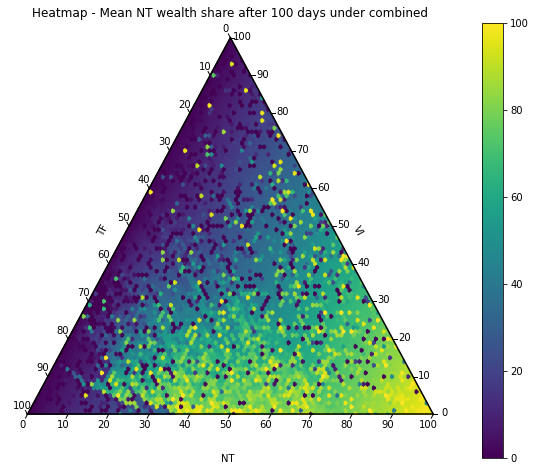

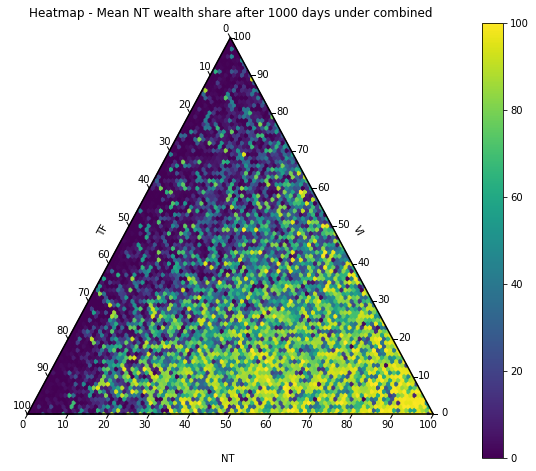

In [12]:
title = "Heatmap - Mean NT wealth share after 100 days under static"
figure, tax = generate_ternary_figure(scale, nt_ws, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 100 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb1000, title)
tax.show()

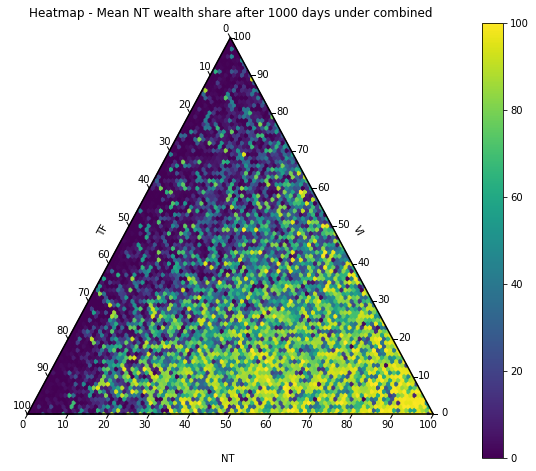

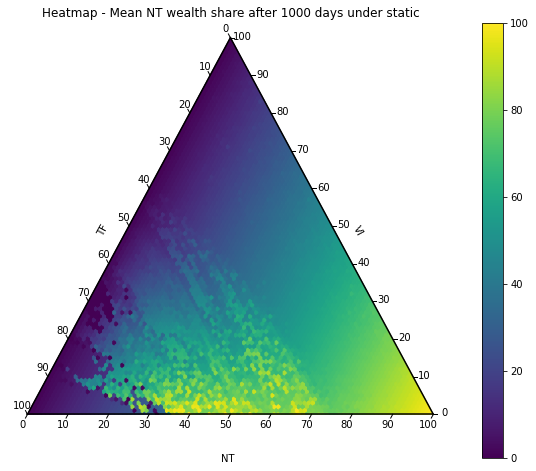

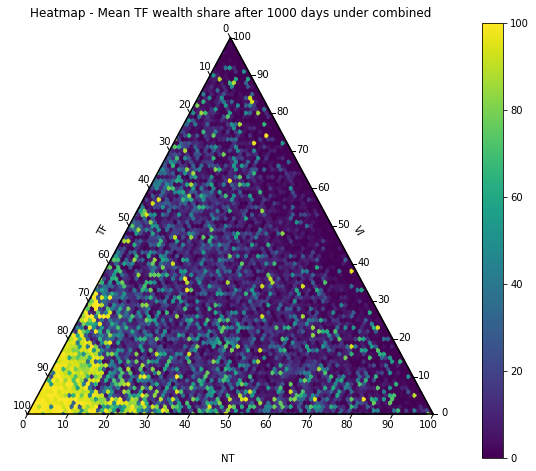

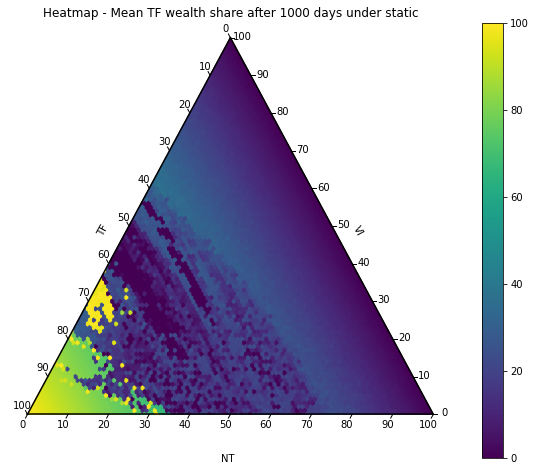

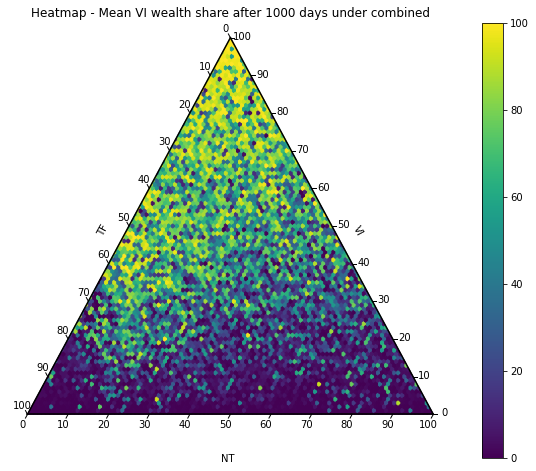

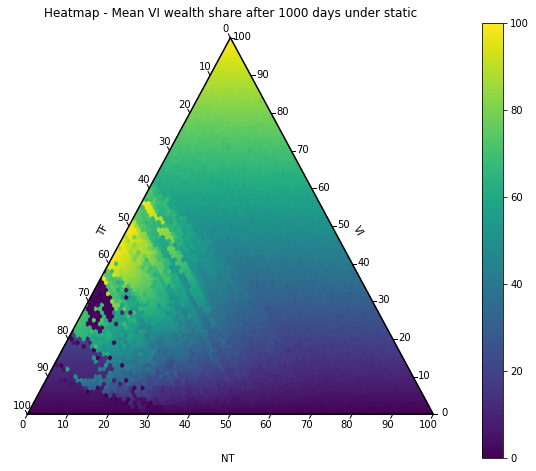

In [15]:
title = "Heatmap - Mean NT wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, nt_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean NT wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, nt_ws1000, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, tf_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean TF wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, tf_ws1000, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under combined"
figure, tax = generate_ternary_figure(scale, vi_ws_cb1000, title)
tax.show()

title = "Heatmap - Mean VI wealth share after 1000 days under static"
figure, tax = generate_ternary_figure(scale, vi_ws1000, title)
tax.show()

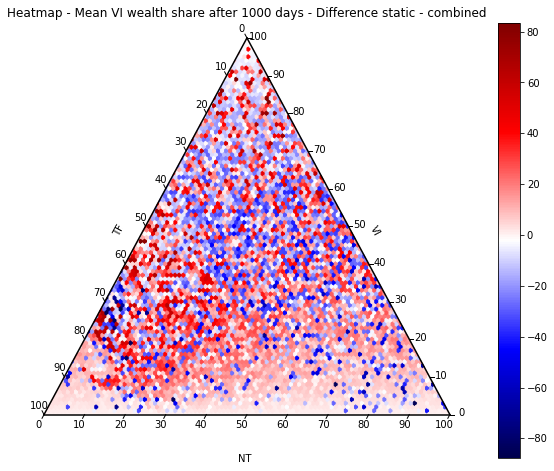

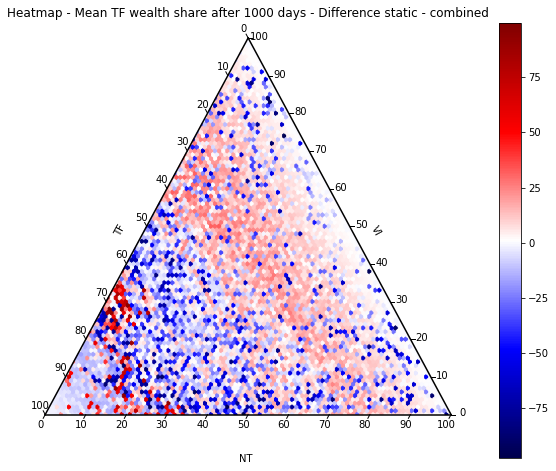

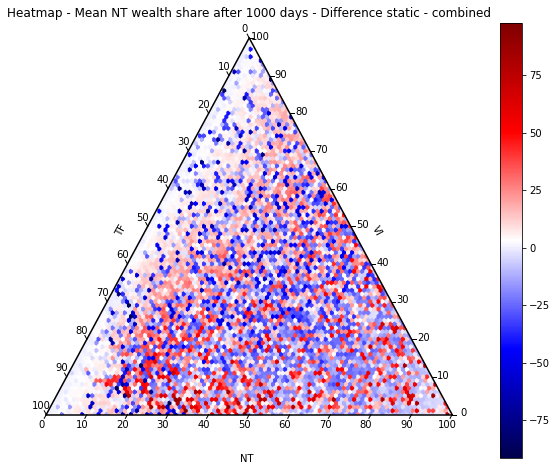

In [24]:
res = {key: vi_ws1000[key] - vi_ws_cb1000.get(key, 0) for key in vi_ws1000.keys()}

title = "Heatmap - Mean VI wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

res = {key: tf_ws1000[key] - tf_ws_cb1000.get(key, 0) for key in tf_ws1000.keys()}

title = "Heatmap - Mean TF wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

res = {key: nt_ws1000[key] - nt_ws_cb1000.get(key, 0) for key in nt_ws1000.keys()}

title = "Heatmap - Mean NT wealth share after 1000 days - Difference static - combined"
figure, tax = generate_ternary_figure(scale, res, title)
tax.show()

